# Entraînement du modèle

Ici nous allons entraîner notre modèle général. Ce modèle est entrainé sur l'ensemble des voitures ou sur un sous-ensemble du jeu de donnée (filter par classes de voitures).

### Importation des bibliothèques

In [1]:
# Ajout du chemin de nos fichiers d'aides
import os
import sys

sys.path.append(os.path.abspath("../helper"))

In [2]:
from typing import Tuple
import math
import shutil

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch


In [15]:
from model import MyModel
from chargement_donnee import get_dataset_transformation, create_subset, ORIGINAL_PATH_DATASET_IMAGES, PATH_DATASET, get_dataset_loader

### Définition des hyperparamètres

In [5]:
BATCH_SIZE = 32
IMAGE_WIDTH = 512
IMAGE_HEIGHT = 512

### Définition des transformations appliquées sur les données

Les détails du code des deux prochaines sections sont dans 'helper/load_dataset.py'

In [6]:
train_tfms, test_tfms = get_dataset_transformation(IMAGE_WIDTH, IMAGE_HEIGHT)
train_tfms, test_tfms

(Compose(
     Resize(size=(512, 512), interpolation=bilinear, max_size=None, antialias=warn)
     RandomHorizontalFlip(p=0.5)
     RandomRotation(degrees=[-15.0, 15.0], interpolation=nearest, expand=False, fill=0)
     ToTensor()
     Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
 ),
 Compose(
     Resize(size=(512, 512), interpolation=bilinear, max_size=None, antialias=warn)
     ToTensor()
     Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
 ))

### Chargement du jeu de donnée

In [25]:
# Initialiser le chemin de la base de donnée et
# potentiellement prendre un sous ensemble des données 
use_subset = True
if use_subset:
    classes = ['Acura Integra Type R 2001', "Bentley Arnage Sedan 2009", "Chevrolet Camaro Convertible 2012", "Acura TSX Sedan 2012"]
    path_dataset = "dataset/car_data_sub/car_data"
    create_subset(ORIGINAL_PATH_DATASET_IMAGES, path_dataset, classes)
else:
    classes = pd.read_csv(os.path.join(PATH_DATASET, "names.csv"), names=["name"])
    classes = list(classes.name)
    path_dataset = ORIGINAL_PATH_DATASET_IMAGES

In [26]:
nb_classes, train_loader, test_loader = get_dataset_loader(path_dataset, train_tfms, test_tfms)

Number of classes 4
Train dataset size is 170
Test dataset size is 167


### Chargement du modèle

Les détails du code est dans le fichier 'helper/model.py'

In [34]:
my_model = MyModel(classes)

device used for the model : cuda


### Entrainement du modèle

In [30]:
training_losses, training_accs, test_accs = my_model.train(train_loader, test_loader, nb_epochs=4)
()

100%|██████████| 6/6 [00:03<00:00,  1.82it/s]


Epoch 1, duration: 3.3079652786254883s, loss: 1.3184, acc: 29.6875


100%|██████████| 6/6 [00:02<00:00,  2.71it/s]


Accuracy on test dataset : 36.53


100%|██████████| 6/6 [00:03<00:00,  1.77it/s]


Epoch 2, duration: 3.3859543800354004s, loss: 1.0266, acc: 47.3958


100%|██████████| 6/6 [00:02<00:00,  2.87it/s]


Accuracy on test dataset : 66.47


100%|██████████| 6/6 [00:03<00:00,  1.81it/s]


Epoch 3, duration: 3.312464475631714s, loss: 0.4677, acc: 73.9583


100%|██████████| 6/6 [00:02<00:00,  2.63it/s]


Accuracy on test dataset : 82.63


100%|██████████| 6/6 [00:03<00:00,  1.88it/s]


Epoch 4, duration: 3.20149564743042s, loss: 0.3272, acc: 78.1250


100%|██████████| 6/6 [00:02<00:00,  2.65it/s]

Accuracy on test dataset : 89.22
End training


()

### Affichage des résultats de l'entraînement

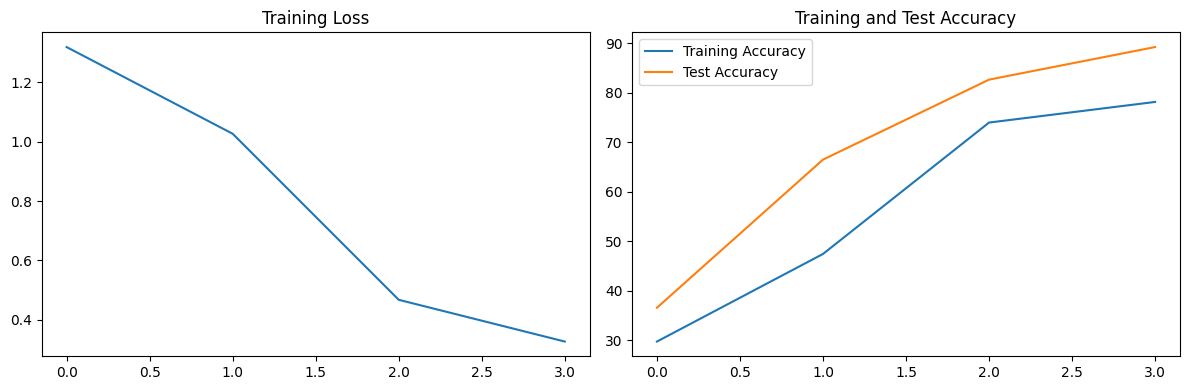

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot training loss
axs[0].plot(training_losses)
axs[0].set_title("Training Loss")

# Plot training and test accuracy
axs[1].plot(training_accs, label="Training Accuracy")
axs[1].plot(test_accs, label="Test Accuracy")
axs[1].set_title("Training and Test Accuracy")
axs[1].legend()

plt.tight_layout()
plt.show()

### Sauvegarde du modèle

In [32]:
my_model.save("../model/model_tmp")